In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

**CARGA DE DATOS**
=====================

In [4]:
archEvent=pd.read_csv('/home/sherly/Escritorio/fiuba-trocafone-tp1-final-set/events.csv',low_memory=False)
archEvent.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
archEvent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

# Visualizacion1: Origen de las visitas de los usuarios a nivel país, región, country.

In [6]:
archEvent.event.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [7]:
archEvent.city.value_counts()

Unknown                   15819
São Paulo                 11711
Rio de Janeiro             3538
Belo Horizonte             2568
Salvador                   2314
Brasília                   1530
Osasco                     1148
Curitiba                   1132
Fortaleza                  1084
Recife                      913
Goiânia                     853
Porto Alegre                799
Guarulhos                   776
São Bernardo do Campo       716
Belém                       640
São Luís                    597
Manaus                      507
Natal                       487
Montes Claros               482
Campinas                    471
Barueri                     466
Santo André                 434
Duque de Caxias             429
Petrolina                   424
Teresina                    388
Sorocaba                    376
Campo Grande                373
Maceió                      370
Contagem                    348
Nova Iguaçu                 311
                          ...  
Guatambu

In [8]:
archEvent.region.value_counts()

Sao Paulo                           24996
Unknown                             14772
Minas Gerais                         7755
Rio de Janeiro                       6913
Bahia                                5737
Pernambuco                           2962
Ceara                                2829
Parana                               2602
Rio Grande do Sul                    2576
Federal District                     1739
Goias                                1564
Santa Catarina                       1511
Para                                 1382
Maranhao                             1303
Espirito Santo                       1257
Rio Grande do Norte                  1064
Paraíba                               875
Piaui                                 824
Alagoas                               751
Mato Grosso do Sul                    618
Amazonas                              600
Tocantins                             596
Mato Grosso                           487
Sergipe                           

In [9]:
archEvent.country.value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
France                   13
Netherlands              13
Mozambique               12
United Kingdom           12
Japan                    11
Poland                    9
French Guiana             8
Portugal                  7
Romania                   7
Italy                     7
Guadeloupe                6
Russia                    6
Dominican Republic        6
Germany                   5
Bangladesh                4
Paraguay                  4
Colombia                  4
Switzerland               3
Angola                    2
India                     2
Morocco                   2
China                     1
Philippines               1
Spain                     1
Sri Lanka                 1
Peru                      1
Turkey                    1
Ireland                   1
Saudi Arabia              1
Belize                    1
Zimbabwe            

In [10]:
origenVisitas=archEvent[['event','person','city','region','country']]
origenVisitas.head()
                

,event,person,city,region,country
0,ad campaign hit,0004b0a2,NaN,NaN,NaN
1,visited site,0004b0a2,Camaragibe,Pernambuco,Brazil
2,viewed product,0004b0a2,NaN,NaN,NaN
3,checkout,0004b0a2,NaN,NaN,NaN
4,viewed product,0006a21a,NaN,NaN,NaN


In [11]:
origenVisitas.dropna(inplace=True)
origenVisitas.head()

,event,person,city,region,country
1,visited site,0004b0a2,Camaragibe,Pernambuco,Brazil
5,visited site,0006a21a,Rio de Janeiro,Rio de Janeiro,Brazil
9,visited site,000a54b2,Rio de Janeiro,Rio de Janeiro,Brazil
16,visited site,000a54b2,Rio de Janeiro,Rio de Janeiro,Brazil
45,visited site,00184bf9,Ribeirão Preto,Sao Paulo,Brazil


In [12]:
origenVisitas.event.unique()

array(['visited site'], dtype=object)

* # Como podemos ver al eliminar las valores nan's el unico evento que registra datos geograficos es el visited site, por lo tanto analizaremos los datos para ese evento 

In [13]:
origenVisitas['cantidad']=1
grup = origenVisitas.groupby(['event','city','region','country']).agg( {'cantidad':'sum'}).sort_values(by='cantidad', ascending=False).head(10)
grup

cantidad
event        city           region           country          
visited site Unknown        Unknown          Brazil      12378
             São Paulo      Sao Paulo        Brazil      11711
             Rio de Janeiro Rio de Janeiro   Brazil       3538
             Belo Horizonte Minas Gerais     Brazil       2568
             Unknown        Unknown          Unknown      2313
             Salvador       Bahia            Brazil       2235
             Brasília       Federal District Brazil       1530
             Osasco         Sao Paulo        Brazil       1148
             Curitiba       Parana           Brazil       1132
             Fortaleza      Ceara            Brazil       1084

## Top 10 de Cantidad de eventos por country

In [14]:
visita_country=archEvent[['person','country']]
visita_country['cantidad']=1
visita_country.dropna(inplace=True)
visita_country=visita_country[visita_country['country']!='Unknown']
visita_country.head()

,person,country,cantidad
1,0004b0a2,Brazil,1
5,0006a21a,Brazil,1
9,000a54b2,Brazil,1
16,000a54b2,Brazil,1
45,00184bf9,Brazil,1


In [15]:
grupVisitaXcountry=visita_country["country"].value_counts().sort_values(ascending=False).head(10)
grupVisitaXcountry

Brazil            84308
United States       465
Argentina            94
Canada               35
France               13
Netherlands          13
Mozambique           12
United Kingdom       12
Japan                11
Poland                9
Name: country, dtype: int64

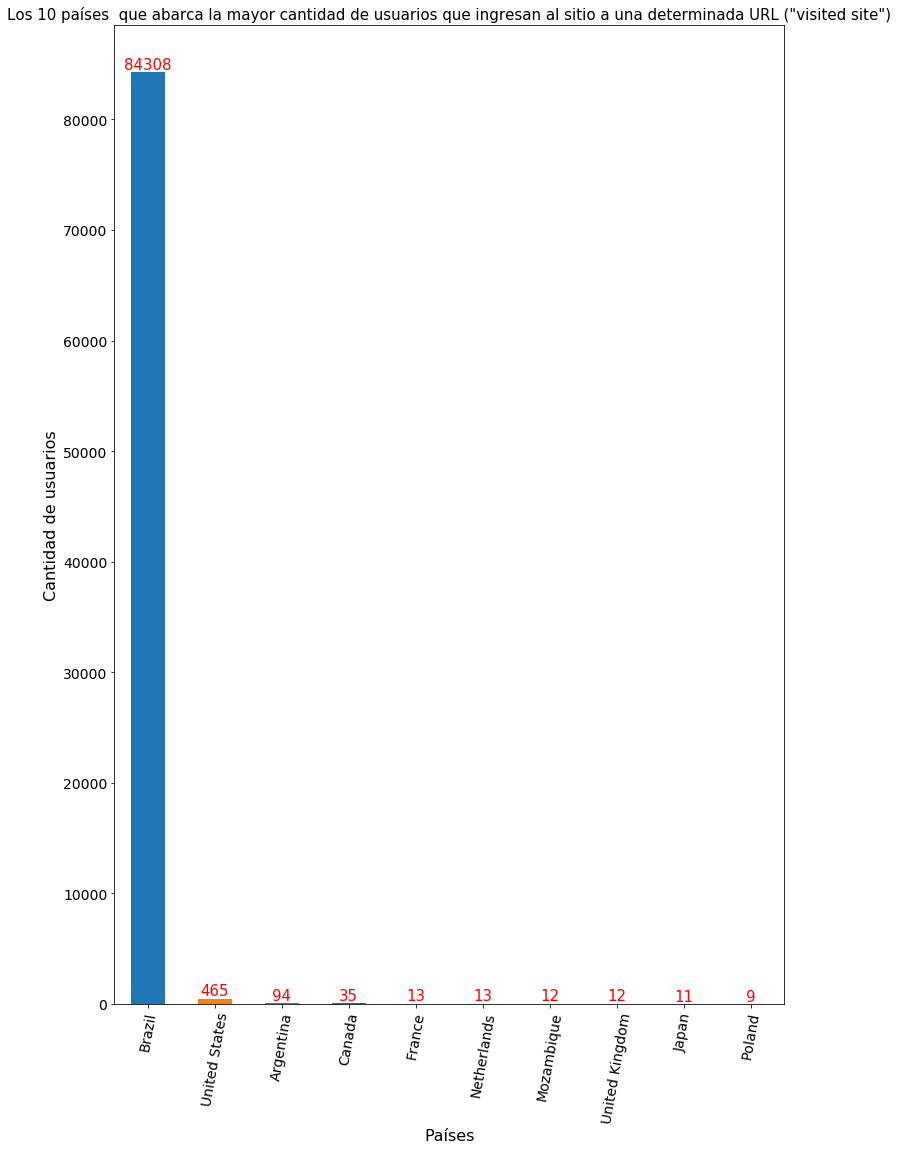

In [18]:
f = plt.figure()

grafhist=grupVisitaXcountry

plt.title('Los 10 países  que abarca la mayor cantidad de usuarios que ingresan al sitio a una determinada URL ("visited site")', color='black',fontsize=15)

ax=grafhist.plot(kind='bar',rot=80,figsize=(12,18),fontsize=14);

ax.set_ylabel('Cantidad de usuarios',fontsize=16);
ax.set_xlabel('Países',fontsize=16);


rects = ax.patches 

for rect, label in zip(rects, grafhist): 
    height = rect.get_height() 
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label,color='red', fontsize=15, ha='center', va='bottom') 


## Top 10 de Cantidad de usuarios por city

In [19]:
visita_city=archEvent[['person','city']]
visita_city['cantidad']=1
visita_city.dropna(inplace=True)
visita_city=visita_city[visita_city['city']!='Unknown']
visita_city.head()

,person,city,cantidad
1,0004b0a2,Camaragibe,1
5,0006a21a,Rio de Janeiro,1
9,000a54b2,Rio de Janeiro,1
16,000a54b2,Rio de Janeiro,1
45,00184bf9,Ribeirão Preto,1


In [20]:
#tenemos un unico evento que brinda los datos de geograficos entonces no es necesario tener el campo person
visita_city=visita_city.drop(['person'], axis=1)
visita_city.head()

,city,cantidad
1,Camaragibe,1
5,Rio de Janeiro,1
9,Rio de Janeiro,1
16,Rio de Janeiro,1
45,Ribeirão Preto,1


In [21]:
grupVisitaXcity=visita_city["city"].value_counts().sort_values(ascending=False).head(10)
grupVisitaXcity

São Paulo         11711
Rio de Janeiro     3538
Belo Horizonte     2568
Salvador           2314
Brasília           1530
Osasco             1148
Curitiba           1132
Fortaleza          1084
Recife              913
Goiânia             853
Name: city, dtype: int64

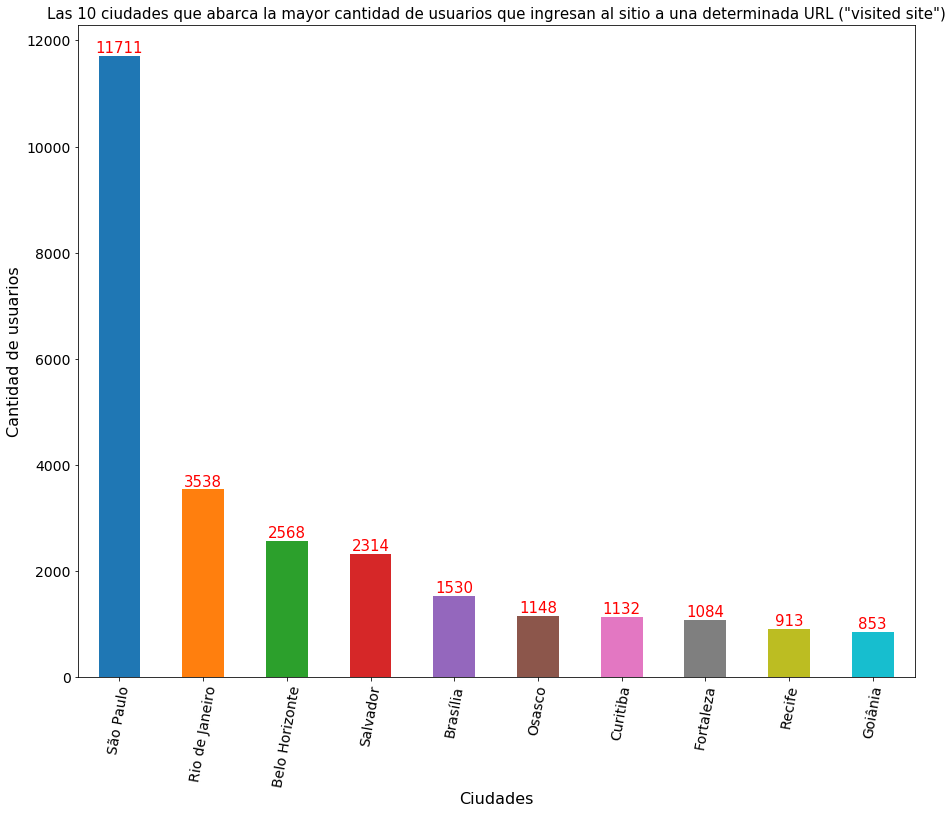

In [22]:
f = plt.figure()

grafhist=grupVisitaXcity

plt.title('Las 10 ciudades que abarca la mayor cantidad de usuarios que ingresan al sitio a una determinada URL ("visited site")', color='black',fontsize=15)

ax=grafhist.plot(kind='bar',rot=80,figsize=(15,12),fontsize=14);

ax.set_ylabel('Cantidad de usuarios',fontsize=16);
ax.set_xlabel('Ciudades',fontsize=16);

rects = ax.patches 

for rect, label in zip(rects, grafhist): 
    height = rect.get_height() 
#     space=5
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label,color='red', fontsize=15, ha='center', va='bottom') 


## Top 10 de Cantidad de usuarios por region

In [23]:
visita_region=archEvent[['person','region']]
visita_region['cantidad']=1
visita_region.dropna(inplace=True)
visita_region=visita_region[visita_region['region']!='Unknown']
visita_region.head()

,person,region,cantidad
1,0004b0a2,Pernambuco,1
5,0006a21a,Rio de Janeiro,1
9,000a54b2,Rio de Janeiro,1
16,000a54b2,Rio de Janeiro,1
45,00184bf9,Sao Paulo,1


In [24]:
visita_region=visita_region.drop(['person'], axis=1)
visita_region.head(5)dataEvent_up

,region,cantidad
1,Pernambuco,1
5,Rio de Janeiro,1
9,Rio de Janeiro,1
16,Rio de Janeiro,1
45,Sao Paulo,1


In [25]:
grupVisitaXregion=visita_region["region"].value_counts().sort_values(ascending=False).head(10)
grupVisitaXregion

Sao Paulo            24996
Minas Gerais          7755
Rio de Janeiro        6913
Bahia                 5737
Pernambuco            2962
Ceara                 2829
Parana                2602
Rio Grande do Sul     2576
Federal District      1739
Goias                 1564
Name: region, dtype: int64

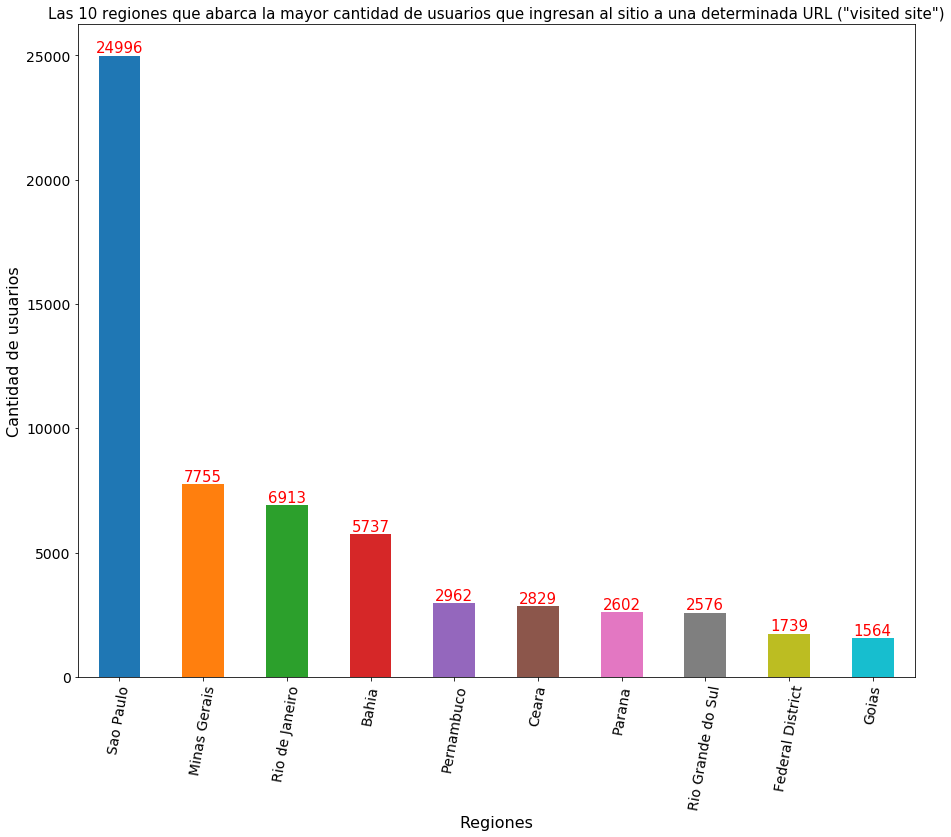

In [26]:
f = plt.figure()

grafhist=grupVisitaXregion

plt.title('Las 10 regiones que abarca la mayor cantidad de usuarios que ingresan al sitio a una determinada URL ("visited site")', color='black',fontsize=15)

ax=grafhist.plot(kind='bar',rot=80,figsize=(15,12),fontsize=14);

ax.set_ylabel('Cantidad de usuarios',fontsize=16);
ax.set_xlabel('Regiones',fontsize=16);

rects = ax.patches 

for rect, label in zip(rects, grafhist): 
    height = rect.get_height() 
#     space=5
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label,color='red', fontsize=15, ha='center', va='bottom') 


***
# Analisis de los campos 
***

In [18]:
archEvent.condition.value_counts()

Bom                   243014
Excelente             152977
Muito Bom             151359
Bom - Sem Touch ID     15295
Novo                    1191
Name: condition, dtype: int64

In [11]:
archEvent.url.value_counts()

/                                                   28323
/comprar/iphone                                      4132
/comprar/iphone/6s                                   3393
/comprar/iphone/6                                    3228
/comprar/samsung                                     2782
/comprar/iphone/iphone-5s                            2689
/comprar/samsung/galaxy-j5                           2446
/comprar/samsung/galaxy-s7-edge                      1972
/comprar/samsung/galaxy-s8                           1499
/comprar/samsung/galaxy-j7                           1465
/comprar/samsung/galaxy-s6-edge                      1415
/comprar/motorola                                    1154
/comprar/samsung/galaxy-s7                           1139
/comprar/iphone/7                                    1120
/comprar/samsung/galaxy-s6-flat                      1067
/comprar/iphone/iphone-6s-plus                        947
/comprar/samsung/samsung-gran-prime-duos-tv           944
/comprar/samsu

In [14]:
archEvent.staticpage.value_counts()

CustomerService                      1528
AboutUs                               443
FaqEcommerce                          347
Quiosks                               326
trust-trocafone                       243
galaxy-s8                             167
TermsAndConditionsReturnEcommerce     156
how-to-sell                            96
Conditions                             89
how-to-buy                             86
TermsAndConditionsEcommerce            59
club-trocafone                         46
PrivacyEcommerce                        9
black_friday                            3
Name: staticpage, dtype: int64

In [14]:
archEvent.model.value_counts()

iPhone 6                                     50916
iPhone 5s                                    44878
iPhone 6S                                    39296
iPhone 7                                     27556
Samsung Galaxy S7 Edge                       23926
Samsung Galaxy S7                            19337
iPhone 7 Plus                                18792
Samsung Galaxy S8                            16959
iPhone SE                                    16531
Samsung Galaxy J5                            13044
iPhone 6S Plus                               12855
iPhone 6 Plus                                12766
iPhone 5c                                    12689
Samsung Galaxy S6 Flat                       11608
Samsung Galaxy S6 Edge                       11175
Samsung Galaxy S8 Plus                       10502
iPhone 5                                      9342
Samsung Galaxy J7 Prime                       9312
Motorola Moto G4 Plus                         8080
Samsung Galaxy J7              

In [3]:
archEvent.skus.value_counts()

2820,6706,6720,2750,6649,7251,6663,12604,7224,2774,2773,2999               594
2820,6706,2750,6720,6649,7252,7224,6663,12604,2774,2773,2999               556
6594,6637,6665,6649,2750,2820,12618,12604,11346,2766,2774,2773             535
6593,1061,480,779,2774,2773,2814,2812,2813,8273,12268,12254                525
6593,2750,6721,2820,12619,2774,2773,2772,2814,2813,725,2812                515
8499,8443,8485,8471                                                        454
6636,6664,2750,2820,6721,7251,12605,12632,2774,2773,2812,2813              451
7252,6593,2750,6721,2820,12619,2774,2773,2772,12646,2814,2813              441
6371,6357,3371,2777,2718,6413,10896,3191,2773,6791,10924,2821              433
2750,6720,2820,12618,12604,7224,2773,2772,2774,2813,2812,2814              432
6594,6651,7239,2820,6706,478,12604,7251,11346,2774,5447,779                422
3371,6357,6371,2777,3191,6791,2718,2725,6399,3179,2893,2821                370
6649,7252,6635,2820,2750,6721,6707,12619,6663,2774,2

In [19]:
archEvent.channel.unique()

array([nan, 'Paid', 'Organic', 'Direct', 'Social', 'Referral', 'Email',
       'Unknown'], dtype=object)

In [24]:
archEvent.staticpage.unique()

array([nan, 'how-to-buy', 'trust-trocafone', 'Quiosks', 'FaqEcommerce',
       'AboutUs', 'Conditions', 'TermsAndConditionsEcommerce',
       'CustomerService', 'galaxy-s8', 'how-to-sell',
       'TermsAndConditionsReturnEcommerce', 'club-trocafone',
       'black_friday', 'PrivacyEcommerce'], dtype=object)

In [20]:
archEvent.campaign_source.unique()

array(['criteo', nan, 'google', 'FacebookAds', 'zanox', 'rtbhouse',
       'voxus', 'bing', 'afilio', 'emblue', 'mercadopago',
       'FacebookSocial', 'datacrush', 'indexa', 'buscape', 'Facebook',
       'rakuten', 'blog', 'yotpo', 'manifest', 'afiliado',
       'MARKETING SOCIAL', 'socialmedia', 'Google Social', 'onsite'],
      dtype=object)

In [24]:
archEvent.storage.unique()

array([nan, '32GB', '64GB', '256GB', '16GB', '8GB', '128GB', '4GB',
       '512MB'], dtype=object)

In [21]:
archEvent.search_engine.unique()

array([nan, 'Google', 'Bing', 'Yahoo', 'Ask'], dtype=object)

In [23]:
archEvent.search_term.value_counts()

Iphone                                             1207
Iphone 6                                           1057
iPhone 6                                           1005
iphone 6                                            932
iphone                                              882
iphone 6s                                           784
Iphone 6s                                           736
iPhone 6s                                           716
Motorola                                            679
iPhone                                              638
J7                                                  580
J5                                                  540
Samsung                                             513
S7                                                  474
iphone 7                                            428
Iphone 7                                            412
iPhone 7                                            371
j7                                              

***
***
***

In [27]:
eventViewed=archEvent[archEvent['event']=='viewed product']
eventViewed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528931 entries, 2 to 1011286
Data columns (total 23 columns):
timestamp                   528931 non-null object
event                       528931 non-null object
person                      528931 non-null object
url                         0 non-null object
sku                         528931 non-null object
model                       528931 non-null object
condition                   528931 non-null object
storage                     528931 non-null object
color                       528931 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country             

In [28]:
eventbrand=archEvent[archEvent['event']=='brand listing']
eventbrand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98635 entries, 12 to 1011165
Data columns (total 23 columns):
timestamp                   98635 non-null object
event                       98635 non-null object
person                      98635 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        98324 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-null objec

In [29]:
eventvisited=archEvent[archEvent['event']=='visited site']
eventvisited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87378 entries, 1 to 1011284
Data columns (total 23 columns):
timestamp                   87378 non-null object
event                       87378 non-null object
person                      87378 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                      87378 non-null object
country                     87378

In [30]:
eventCampania=archEvent[archEvent['event']=='ad campaign hit']
eventCampania.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82827 entries, 0 to 1011285
Data columns (total 23 columns):
timestamp                   82827 non-null object
event                       82827 non-null object
person                      82827 non-null object
url                         82756 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             82796 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-null ob

In [31]:
eventGenericListing=archEvent[archEvent['event']=='generic listing']
eventGenericListing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67534 entries, 8 to 1011279
Data columns (total 23 columns):
timestamp                   67534 non-null object
event                       67534 non-null object
person                      67534 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        67421 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-null object

In [32]:
eventSearchedProduct=archEvent[archEvent['event']=='searched products']
eventSearchedProduct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56073 entries, 157 to 1011280
Data columns (total 23 columns):
timestamp                   56073 non-null object
event                       56073 non-null object
person                      56073 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        55954 non-null object
search_term                 48967 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-null 

In [33]:
eventSearchEngine=archEvent[archEvent['event']=='search engine hit']
eventSearchEngine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50957 entries, 10 to 1011276
Data columns (total 23 columns):
timestamp                   50957 non-null object
event                       50957 non-null object
person                      50957 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               50957 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-null objec

In [34]:
eventCheckout=archEvent[archEvent['event']=='checkout']
eventCheckout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33735 entries, 3 to 1011287
Data columns (total 23 columns):
timestamp                   33735 non-null object
event                       33735 non-null object
person                      33735 non-null object
url                         0 non-null object
sku                         33735 non-null object
model                       33733 non-null object
condition                   33733 non-null object
storage                     33733 non-null object
color                       33733 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0

In [35]:
eventStaticPage=archEvent[archEvent['event']=='staticpage']
eventStaticPage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3598 entries, 254 to 1009809
Data columns (total 23 columns):
timestamp                   3598 non-null object
event                       3598 non-null object
person                      3598 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  3598 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-null object
de

In [36]:
eventConversion=archEvent[archEvent['event']=='conversion']
eventConversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 220 to 1008943
Data columns (total 23 columns):
timestamp                   1172 non-null object
event                       1172 non-null object
person                      1172 non-null object
url                         0 non-null object
sku                         1172 non-null object
model                       1172 non-null object
condition                   1172 non-null object
storage                     1172 non-null object
color                       1172 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-nu

In [37]:
eventlead=archEvent[archEvent['event']=='lead']
eventlead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 3248 to 1003073
Data columns (total 23 columns):
timestamp                   448 non-null object
event                       448 non-null object
person                      448 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       448 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-null object
device

# Visu2:  Eventos vs canales desde donde fueron originados

In [38]:
eventvisited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87378 entries, 1 to 1011284
Data columns (total 23 columns):
timestamp                   87378 non-null object
event                       87378 non-null object
person                      87378 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                      87378 non-null object
country                     87378

In [39]:
event_channel=eventvisited[['timestamp','person','channel','new_vs_returning','city','region','country','device_type','screen_resolution','operating_system_version','browser_version']]
event_channel.head()

,timestamp,person,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1,2018-05-31 23:38:05,0004b0a2,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
5,2018-05-29 13:29:26,0006a21a,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
9,2018-04-09 20:12:31,000a54b2,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0
16,2018-05-24 11:21:07,000a54b2,Paid,Returning,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0
45,2018-04-06 05:12:05,00184bf9,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0


In [40]:
event_channel.channel.unique()

array(['Paid', 'Organic', 'Direct', 'Social', 'Referral', 'Email',
       'Unknown'], dtype=object)

In [41]:
channel=event_channel[['channel']]
channel['cantidad']=1
channel.dropna(inplace=True)
# event_channel=event_channel[event_channel['channel']!='Unknown']
channel.head()

,channel,cantidad
1,Paid,1
5,Paid,1
9,Paid,1
16,Paid,1
45,Organic,1


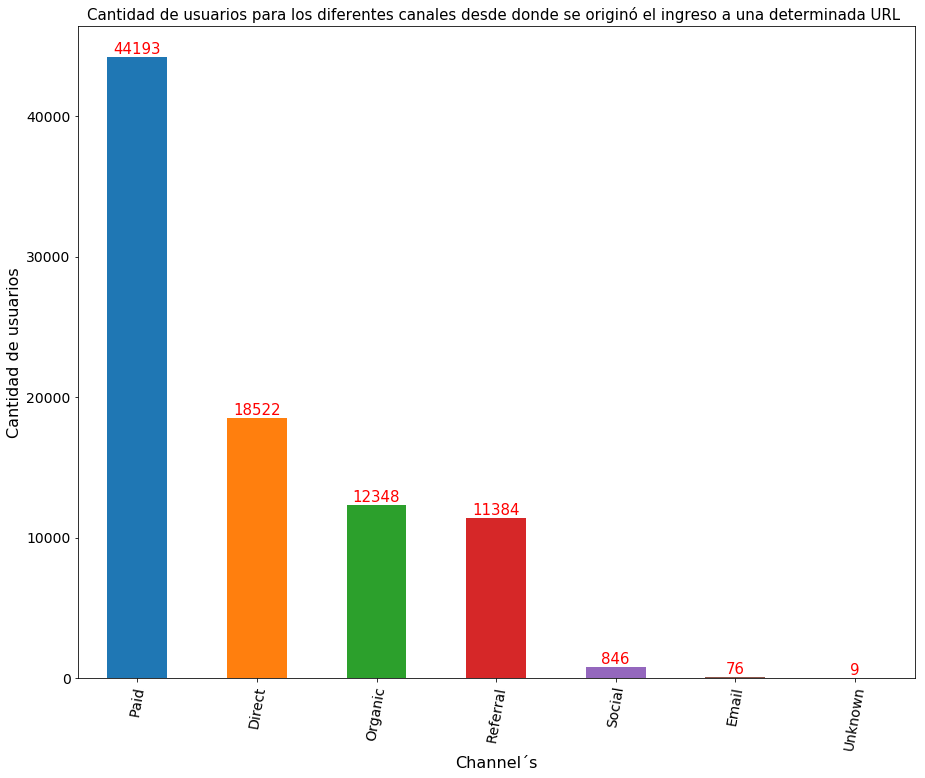

In [42]:
f = plt.figure()

grafhist=channel["channel"].value_counts().sort_values(ascending=False)

plt.title('Cantidad de usuarios para los diferentes canales desde donde se originó el ingreso a una determinada URL ', color='black',fontsize=15)

ax=grafhist.plot(kind='bar',rot=80,figsize=(15,12),fontsize=14);

ax.set_ylabel('Cantidad de usuarios',fontsize=16);
ax.set_xlabel('Channel´s',fontsize=16);


rects = ax.patches 

for rect, label in zip(rects, grafhist): 
    height = rect.get_height() 
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label,color='red', fontsize=15, ha='center', va='bottom') 


# Visu3:Al saber que la mayor cantidad de usuarios exiten en Brazil, veremos cuales son las ciudades que usan el canal PAID para visitar una URL

In [220]:
paid_region=event_channel[(event_channel['channel']=='Paid') & (event_channel['country']=='Brazil') ]
paid_region.head()

,timestamp,person,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1,2018-05-31 23:38:05,0004b0a2,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
5,2018-05-29 13:29:26,0006a21a,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
9,2018-04-09 20:12:31,000a54b2,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0
16,2018-05-24 11:21:07,000a54b2,Paid,Returning,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0
96,2018-05-17 00:08:56,0019c395,Paid,New,Unknown,Unknown,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 66.0


In [319]:
paid_region=paid_region[['region']]
paid_region['cantidad']=1
paid_region.dropna(inplace=True)
# event_channel=event_channel[event_channel['channel']!='Unknown']
paid_region.head()

,region,cantidad
1,Pernambuco,1
5,Rio de Janeiro,1
9,Rio de Janeiro,1
16,Rio de Janeiro,1
96,Unknown,1


In [209]:
paid_region=paid_region.groupby('region').agg({'cantidad':'sum'})
paid_region

,region,cantidad
0,Sao Paulo,12809
1,Unknown,6151
2,Minas Gerais,4045
3,Rio de Janeiro,3331
4,Bahia,2896
5,Ceara,1540
6,Parana,1458
7,Pernambuco,1449
8,Rio Grande do Sul,980
9,Federal District,898


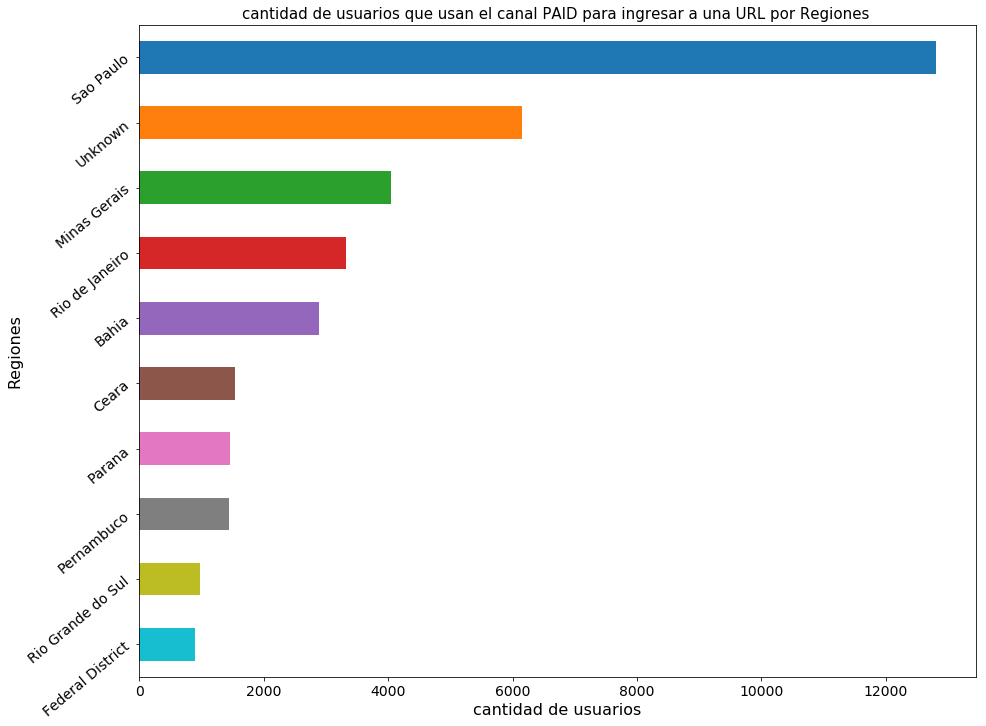

In [324]:
f = plt.figure()

graf=paid_region["region"].value_counts().sort_values(ascending=False).head(10)

plt.title('cantidad de usuarios que usan el canal PAID para ingresar a una URL por Regiones ', color='black',fontsize=15)

ax=graf.plot(kind='barh',rot=40,figsize=(15,12),fontsize=14,align='center');
ax.invert_yaxis()
ax.set_ylabel('Regiones',fontsize=16);
ax.set_xlabel('cantidad de usuarios',fontsize=16);

# Visu4: Que terminos de busqueda usan los usuarios, para encontrar un producto dentro de la interfaz de busqueda del sitio.

In [234]:
busqueda_terminos=eventSearchedProduct[['timestamp','person','skus','search_term']]
busqueda_terminos.head()

,timestamp,person,skus,search_term
157,2018-02-06 02:29:49,00204059,"2692,6819,823,2779,13864,2784,8135,6805,2773,2...",moto g 4
159,2018-02-06 02:32:41,00204059,"2692,6819,823,2779,13864,2784,8135,6805,2773,2...",moto g 4
238,2018-05-21 19:56:33,0024ad28,"3371,6357,6371,10896,2718,2777,6001,2694,3191,...",comprar celulares usados bom e barato em poa rs
239,2018-05-21 19:57:28,0024ad28,"3371,6357,6371,10896,2718,2777,6001,2694,3191,...",comprar celulares seminovos bom e barato em po...
240,2018-05-21 19:57:49,0024ad28,"3371,6357,6371,10896,2718,2777,6001,2694,3191,...",comprar celulares seminovos bom e barato em po...


In [332]:
busqueda_terminos.search_term.value_counts().sort_values(ascending=False)

Iphone                    1207
Iphone 6                  1057
iPhone 6                  1005
iphone 6                   932
iphone                     882
iphone 6s                  784
Iphone 6s                  736
iPhone 6s                  716
Motorola                   679
iPhone                     638
J7                         580
J5                         540
Samsung                    513
S7                         474
iphone 7                   428
Iphone 7                   412
iPhone 7                   371
j7                         370
s8                         354
S8                         346
Iphone 5s                  343
iPhone 5s                  339
iphone 5s                  315
IPhone 6                   315
j5                         310
S6                         302
s7                         289
6s                         270
Iphone 6 plus              256
Lg                         252
                          ... 
k10 pro                      1
OnePlus 

In [331]:
busqueda_terminos.skus.value_counts()

8485,8471,8443,6371,12758,6357,6011,3179,2777,6413,2778,3371             260
8485,8471,6371,6413,8443,6357,3179,12758,2718,2741,3371,2777             212
6371,6357,3371,2777,2718,6413,10896,3191,6248,2773,6791,10924            197
3371,6357,6371,2777,3191,6791,2718,2725,6399,3179,2893,2821              174
6371,6356,3371,2777,6413,2718,10896,3191,6023,6248,2773,6791             173
8485,8471,8443,6370,12758,6356,6011,3179,6413,2777,3371,2778             170
8485,8471,8443,6371,12758,6357,6011,3179,6413,2777,3371,2778             155
3371,6357,6371,2777,2718,6001,3191,6248,8541,10896,6791,2893             139
8485,8471,6371,6413,8443,6357,12758,2741,6011,3179,2777,3371             131
8485,8471,6371,6413,8443,6357,2741,3179,12758,2718,3371,2777             129
6370,6356,3371,2777,2718,10896,3191,6413,2694,6791,2725,2773             128
8485,8471,6371,6413,8443,6357,3179,2741,12758,2718,3371,2777             116
8485,8471,8443,6371,12758,6357,6011,3179,2777,6413,3359,2778             115

In [ ]:
# cantidad de productos que visualizaron cada vez que hicieron una busqueda


# Visu5: Veremos la cantidad de usuarios que vieron la pagina de un producto y cuantos de esos productos se vendieron

In [43]:
codigoProducto=archEvent[['sku','model','condition','storage','color']]
codigoProducto.dropna(inplace=True)
codigoProducto.drop_duplicates(subset='sku',inplace=True)
codigoProducto.head()

,sku,model,condition,storage,color
2,2694.0,iPhone 5s,Bom,32GB,Cinza espacial
4,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado
13,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto
22,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado
26,6581.0,iPhone 6S,Bom,16GB,Cinza espacial


In [44]:
s=codigoProducto.model.str.split(' ',1,expand=True)
s.head()

,0,1
2,iPhone,5s
4,Samsung,Galaxy S8
13,Motorola,Moto Z Play
22,iPhone,7 Plus
26,iPhone,6S


In [45]:
codigoProducto=codigoProducto.join(s)
codigoProducto.head()

,sku,model,condition,storage,color,0,1
2,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,iPhone,5s
4,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,Samsung,Galaxy S8
13,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto,Motorola,Moto Z Play
22,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado,iPhone,7 Plus
26,6581.0,iPhone 6S,Bom,16GB,Cinza espacial,iPhone,6S


In [46]:
codigoProducto.columns

Index(['sku', 'model', 'condition', 'storage', 'color', 0, 1], dtype='object')

In [47]:
codigoProducto.rename(columns={0:'brand_model',1:'version_model'},inplace=True)
codigoProducto.head()

,sku,model,condition,storage,color,brand_model,version_model
2,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,iPhone,5s
4,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,Samsung,Galaxy S8
13,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto,Motorola,Moto Z Play
22,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado,iPhone,7 Plus
26,6581.0,iPhone 6S,Bom,16GB,Cinza espacial,iPhone,6S


In [9]:
codigoProducto[codigoProducto.duplicated(subset='sku',keep=False)]

,sku,model,condition,storage,color,brand_model,version_model


***
***
***
***


In [48]:
eventViewed=eventViewed[['timestamp','event','person','sku','model','condition','storage','color']]
eventViewed.head()

,timestamp,event,person,sku,model,condition,storage,color
2,2018-05-31 23:38:09,viewed product,0004b0a2,2694.0,iPhone 5s,Bom,32GB,Cinza espacial
4,2018-05-29 13:29:25,viewed product,0006a21a,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado
13,2018-04-09 20:13:14,viewed product,000a54b2,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto
22,2018-05-24 11:27:47,viewed product,000a54b2,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado
26,2018-05-24 11:28:59,viewed product,000a54b2,6581.0,iPhone 6S,Bom,16GB,Cinza espacial


In [49]:
eventViewed.isna().sum()

timestamp    0
event        0
person       0
sku          0
model        0
condition    0
storage      0
color        0
dtype: int64

In [50]:
eventViewed['sku'].value_counts()

2830.0     4007
2829.0     3466
2831.0     3423
8443.0     3265
12758.0    2714
2833.0     2685
9930.0     2415
5907.0     2404
3371.0     2343
2692.0     2235
8485.0     2161
8513.0     2157
6371.0     2136
6357.0     2075
6581.0     2072
2832.0     2050
1309.0     2047
12730.0    2031
12744.0    2029
8471.0     1999
1310.0     1968
6023.0     1968
283.0      1966
8541.0     1949
8555.0     1915
3359.0     1828
8527.0     1823
284.0      1813
2691.0     1805
12760.0    1782
           ... 
12914.0       1
8917.0        1
13040.0       1
11850         1
10758         1
4116.0        1
12422         1
4285          1
8890.0        1
13726.0       1
9680          1
8918.0        1
12703         1
8035          1
4176.0        1
8778.0        1
15683         1
8372          1
1661.0        1
6906.0        1
6008          1
3935          1
11610.0       1
12886.0       1
14089.0       1
12578         1
3492.0        1
15534         1
17485         1
2822          1
Name: sku, Length: 3568,

In [51]:
eventConversion_sinNull=eventConversion[['timestamp','event','person','sku','model','condition','storage','color']]
eventConversion_sinNull.head()

,timestamp,event,person,sku,model,condition,storage,color
220,2018-03-20 17:46:12,conversion,00204059,3084.0,Motorola Moto X2,Muito Bom,32GB,Couro Vintage
2282,2018-04-26 22:28:53,conversion,00c13dee,6650.0,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco
2547,2018-06-10 14:37:50,conversion,00fdbb4b,3348.0,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco
4245,2018-03-16 13:50:25,conversion,0146a9df,2694.0,iPhone 5s,Bom,32GB,Cinza espacial
6985,2018-02-09 22:07:07,conversion,01db2fe6,6357.0,Samsung Galaxy J5,Bom,16GB,Preto


In [52]:
eventConversion_sinNull['sku'].value_counts()

6371.0     30
6370.0     18
7631.0     17
2692.0     16
3371.0     14
6343.0     12
2711.0     12
283.0      11
6357.0     11
2682.0      9
3192.0      9
3347.0      9
4559.0      9
6721.0      8
2667.0      8
9288.0      8
2694.0      8
3647.0      7
2834.0      7
12758.0     7
9511.0      7
6356.0      7
6001.0      7
7966.0      7
6412.0      6
6384.0      6
290.0       6
3359.0      6
3191.0      6
297.0       6
           ..
8245.0      1
9442.0      1
12716.0     1
6357        1
1059.0      1
9440        1
3000.0      1
10939.0     1
814.0       1
9973.0      1
12550.0     1
4883.0      1
9287.0      1
4872.0      1
7533.0      1
2772.0      1
115.0       1
11401.0     1
5921.0      1
172.0       1
12982.0     1
10155.0     1
11862.0     1
3301.0      1
17199.0     1
12730.0     1
1073.0      1
11416.0     1
7335.0      1
10365.0     1
Name: sku, Length: 476, dtype: int64

In [53]:
eventConversion_sinNull.isna().sum()

timestamp    0
event        0
person       0
sku          0
model        0
condition    0
storage      0
color        0
dtype: int64

In [54]:
visitas=eventViewed[['sku']]
visitas['cantVisitas']=1
visitas=visitas.groupby('sku').agg({'cantVisitas':'sum'})
visitas=visitas.sort_values(by='cantVisitas',ascending=False)
visitas.reset_index(inplace=True)
visitas.head()

,sku,cantVisitas
0,2830.0,4007
1,2829.0,3466
2,2831.0,3423
3,8443.0,3265
4,12758.0,2714


In [55]:
ventas=eventConversion_sinNull[['sku']]
ventas['cantCompra']=1
ventas=ventas.groupby('sku').agg({'cantCompra':'sum'})
ventas=ventas.sort_values(by='cantCompra',ascending=False)
ventas.reset_index(inplace=True)
ventas.head()

,sku,cantCompra
0,6371.0,30
1,6370.0,18
2,7631.0,17
3,2692.0,16
4,3371.0,14


In [56]:
#unimos las 2 tablas para ver la cantidad de visitas y compras que obtuvo ese producto
visitas_ventas=pd.merge(visitas, ventas, how='right', on=['sku'])
visitas_ventas.set_index('sku',inplace=True)
visitas_ventas.head()

,cantVisitas,cantCompra
sku,,
2830.0,4007,3
2829.0,3466,4
2831.0,3423,4
8443.0,3265,4
12758.0,2714,7


In [57]:
visitas_ventas.sort_values(by='cantCompra',ascending=False).head(10)

,cantVisitas,cantCompra
sku,,
6371.0,2136,30
6370.0,913,18
7631.0,687,17
2692.0,2235,16
3371.0,2343,14
2711.0,1492,12
6343.0,740,12
283.0,1966,11
6357.0,2075,11


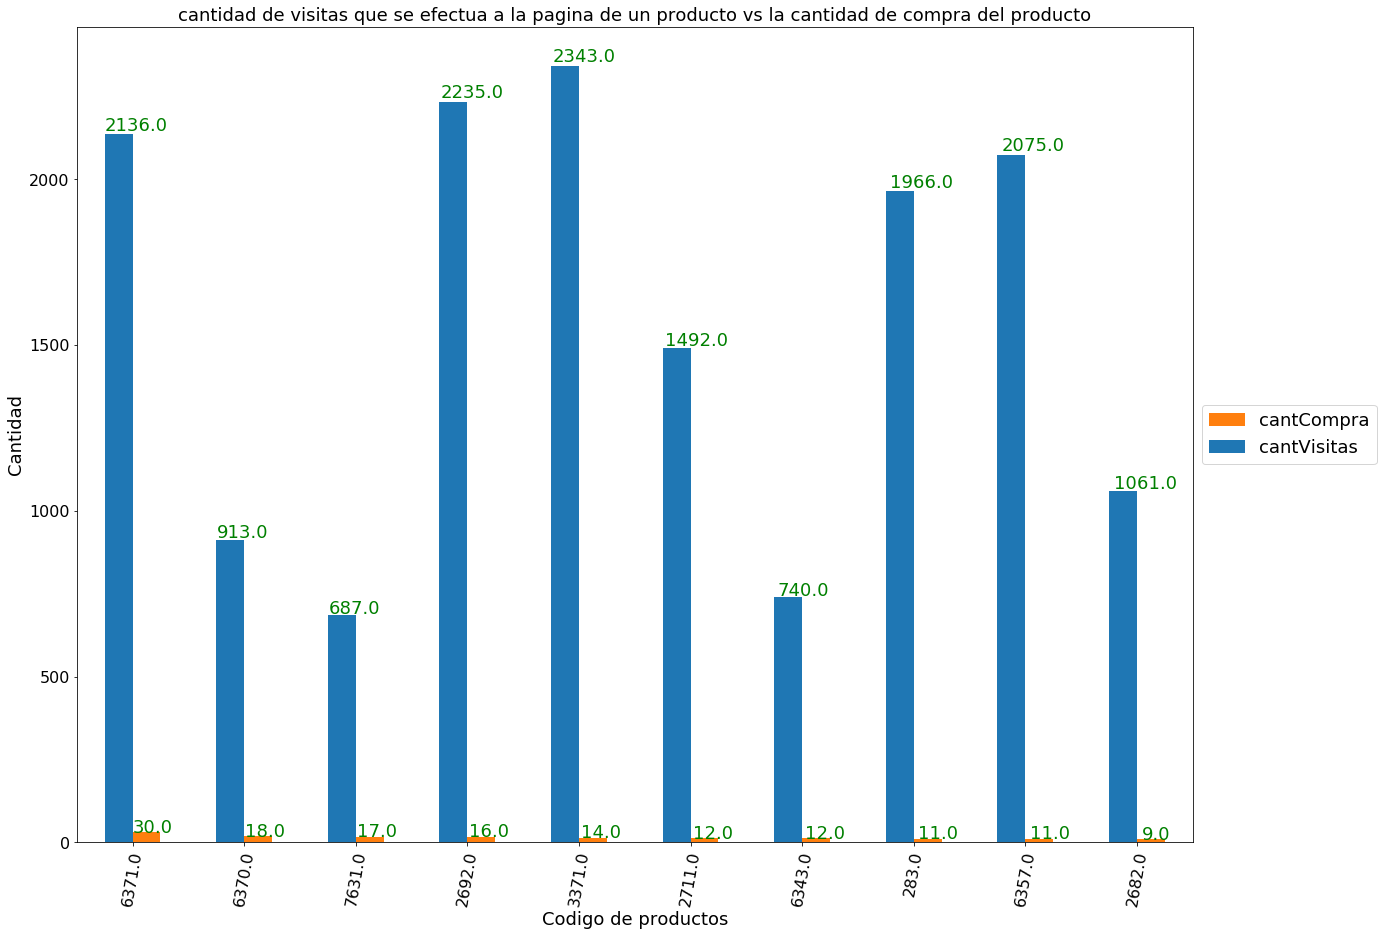

In [65]:
f = plt.figure()
topvisitas_ventas=visitas_ventas.sort_values(by='cantCompra',ascending=False).head(10)
ax = topvisitas_ventas.plot(kind='bar',rot=80,figsize=(20,15),fontsize=16,ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=18)
ax.set_ylabel('Cantidad',fontsize=18);
ax.set_xlabel('Codigo de productos',fontsize=18);
ax.set_title('cantidad de visitas que se efectua a la pagina de un producto vs la cantidad de compra del producto', color='black',fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),color='g',fontsize=18)

plt.show()


In [68]:
# Como solo mostramos el codigo de los productos, acontinuacion mostramos una descripcion del mismo
name_ventas_visitas=visitas_ventas.sort_values(by='cantCompra',ascending=False)
name_ventas_visitas.reset_index(inplace=True)
name_ventas_visitas.head()

,sku,cantVisitas,cantCompra
0,6371.0,2136,30
1,6370.0,913,18
2,7631.0,687,17
3,2692.0,2235,16
4,3371.0,2343,14


In [69]:
codigoProducto.head()

,sku,model,condition,storage,color,brand_model,version_model
2,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,iPhone,5s
4,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,Samsung,Galaxy S8
13,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto,Motorola,Moto Z Play
22,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado,iPhone,7 Plus
26,6581.0,iPhone 6S,Bom,16GB,Cinza espacial,iPhone,6S


In [70]:
name_ventas_visitas=pd.merge(name_ventas_visitas, codigoProducto, on='sku', how='left')
name_ventas_visitas.head(10)

,sku,cantVisitas,cantCompra,model,condition,storage,color,brand_model,version_model
0,6371.0,2136,30,Samsung Galaxy J5,Bom,16GB,Dourado,Samsung,Galaxy J5
1,6370.0,913,18,Samsung Galaxy J5,Muito Bom,16GB,Dourado,Samsung,Galaxy J5
2,7631.0,687,17,Motorola Moto G3 4G,Bom,16GB,Preto,Motorola,Moto G3 4G
3,2692.0,2235,16,iPhone 5s,Bom,16GB,Cinza espacial,iPhone,5s
4,3371.0,2343,14,Samsung Galaxy S6 Flat,Bom,32GB,Dourado,Samsung,Galaxy S6 Flat
5,2711.0,1492,12,iPhone 5,Bom,16GB,Preto,iPhone,5
6,6343.0,740,12,Samsung Galaxy J5,Bom,16GB,Branco,Samsung,Galaxy J5
7,283.0,1966,11,iPhone 5s,Muito Bom,16GB,Cinza espacial,iPhone,5s
8,6357.0,2075,11,Samsung Galaxy J5,Bom,16GB,Preto,Samsung,Galaxy J5
9,2682.0,1061,9,iPhone 5c,Bom,16GB,Branco,iPhone,5c


In [71]:
topvisitas_ventasII=name_ventas_visitas[['model','condition','storage','cantVisitas','cantCompra']]
topvisitas_ventasII.set_index(['model','condition','storage'],inplace=True)
# topvisitas_ventasII.head()

In [72]:
topvisitas_ventasII.head()

cantVisitas  cantCompra
model                  condition storage                         
Samsung Galaxy J5      Bom       16GB            2136          30
                       Muito Bom 16GB             913          18
Motorola Moto G3 4G    Bom       16GB             687          17
iPhone 5s              Bom       16GB            2235          16
Samsung Galaxy S6 Flat Bom       32GB            2343          14

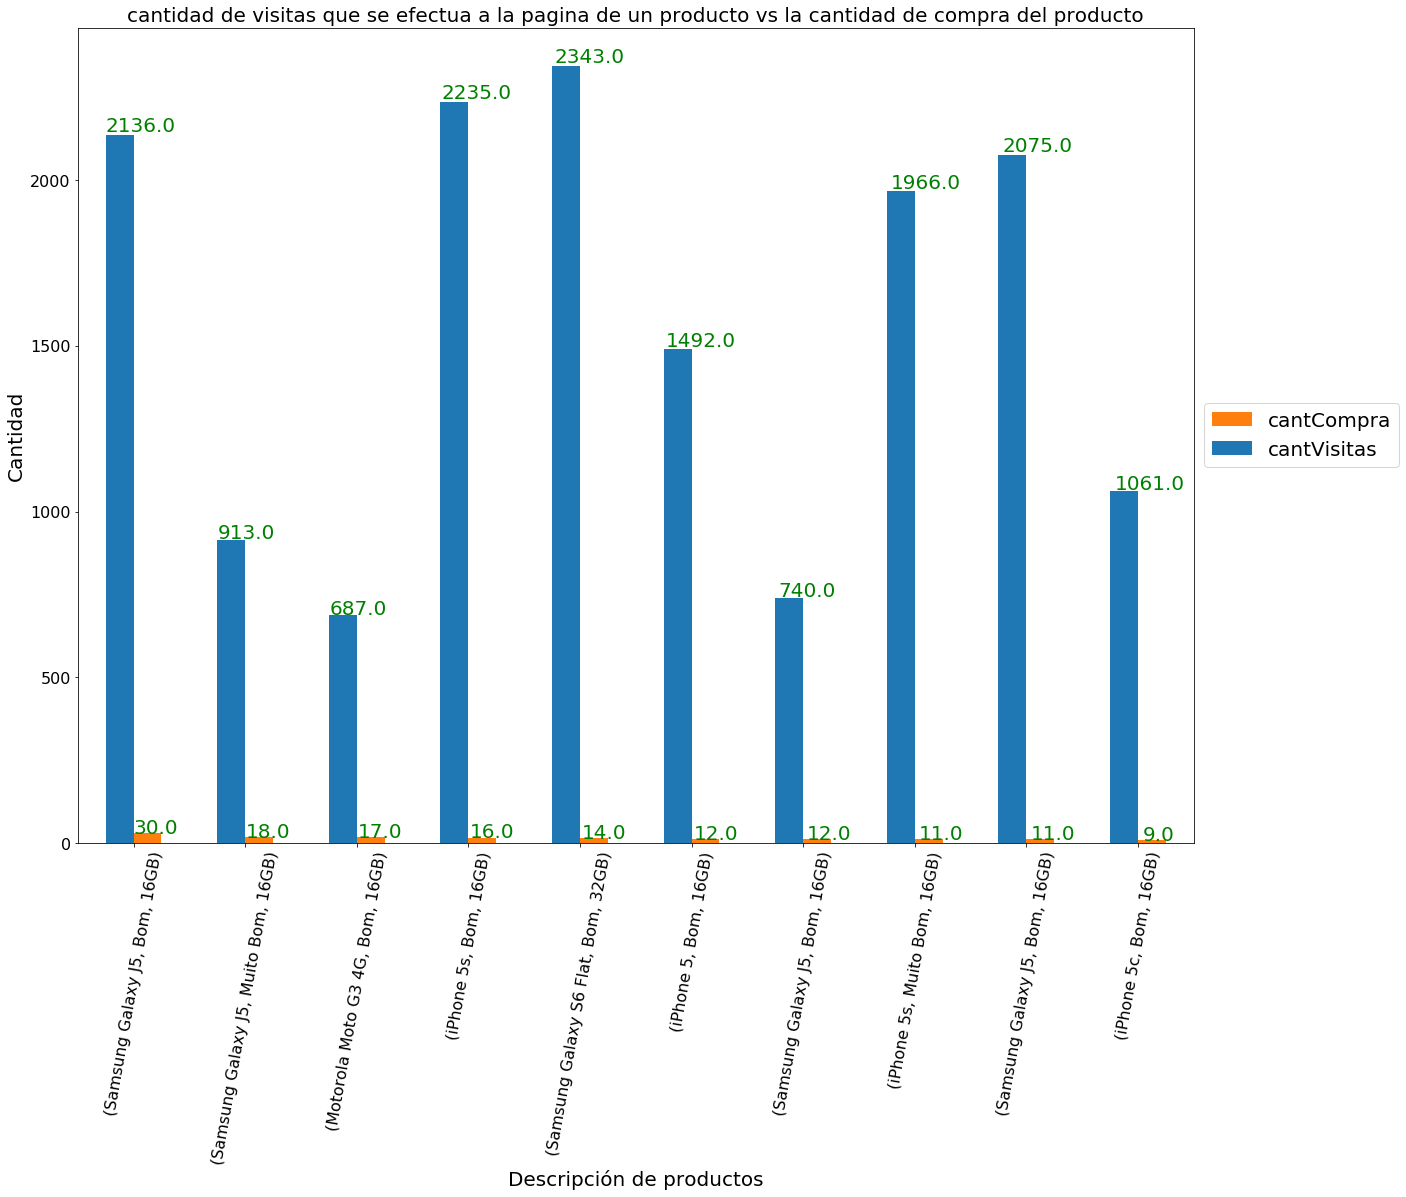

In [73]:
f = plt.figure()
topvisitas_ventasII=topvisitas_ventasII.sort_values(by='cantCompra',ascending=False).head(10)
ax = topvisitas_ventasII.plot(kind='bar',rot=80,figsize=(20,15),fontsize=16,ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=20)
ax.set_ylabel('Cantidad',fontsize=20);
ax.set_xlabel('Descripción de productos',fontsize=20);
ax.set_title('cantidad de visitas que se efectua a la pagina de un producto vs la cantidad de compra del producto', color='black',fontsize=20)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),color='g',fontsize=20)

plt.show()

# Conclusion: Como podemos ver, uno se imaginaria que a mayor vistas de un producto será más la venta de ese producto pues no es asi la visualizacion asi lo demuestra

# Visu 6: La marca que es mas visitado por los usuarios corresponde a la marca mas vendida

# Visita a la pagina de un producto 

In [74]:
eventViewed.head()

,timestamp,event,person,sku,model,condition,storage,color
2,2018-05-31 23:38:09,viewed product,0004b0a2,2694.0,iPhone 5s,Bom,32GB,Cinza espacial
4,2018-05-29 13:29:25,viewed product,0006a21a,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado
13,2018-04-09 20:13:14,viewed product,000a54b2,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto
22,2018-05-24 11:27:47,viewed product,000a54b2,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado
26,2018-05-24 11:28:59,viewed product,000a54b2,6581.0,iPhone 6S,Bom,16GB,Cinza espacial


In [75]:
distri=eventViewed.model.str.split(' ',1,expand=True)
eventViewed_DistriModel=eventViewed.join(distri)
eventViewed_DistriModel.head()

,timestamp,event,person,sku,model,condition,storage,color,0,1
2,2018-05-31 23:38:09,viewed product,0004b0a2,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,iPhone,5s
4,2018-05-29 13:29:25,viewed product,0006a21a,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,Samsung,Galaxy S8
13,2018-04-09 20:13:14,viewed product,000a54b2,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto,Motorola,Moto Z Play
22,2018-05-24 11:27:47,viewed product,000a54b2,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado,iPhone,7 Plus
26,2018-05-24 11:28:59,viewed product,000a54b2,6581.0,iPhone 6S,Bom,16GB,Cinza espacial,iPhone,6S


In [76]:
eventViewed_DistriModel.rename(columns={0:'brand_model',1:'version_model'},inplace=True)
eventViewed_DistriModel.head()

,timestamp,event,person,sku,model,condition,storage,color,brand_model,version_model
2,2018-05-31 23:38:09,viewed product,0004b0a2,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,iPhone,5s
4,2018-05-29 13:29:25,viewed product,0006a21a,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,Samsung,Galaxy S8
13,2018-04-09 20:13:14,viewed product,000a54b2,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto,Motorola,Moto Z Play
22,2018-05-24 11:27:47,viewed product,000a54b2,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado,iPhone,7 Plus
26,2018-05-24 11:28:59,viewed product,000a54b2,6581.0,iPhone 6S,Bom,16GB,Cinza espacial,iPhone,6S


In [77]:
eventViewed_DistriModel.brand_model.unique()

array(['iPhone', 'Samsung', 'Motorola', 'Asus', 'Quantum', 'Lenovo',
       'Sony', 'LG', 'iPad'], dtype=object)

In [78]:
dataPie=eventViewed_DistriModel[['brand_model']]
dataPie['cantidad']=1
dataPie=dataPie.groupby('brand_model').agg({'cantidad':'sum'}).sort_values(by='cantidad',ascending=False)
dataPie.reset_index(inplace=True)
dataPie

,brand_model,cantidad
0,iPhone,242014
1,Samsung,202648
2,Motorola,59547
3,LG,9098
4,Sony,6782
5,Lenovo,4483
6,Asus,2023
7,iPad,1839
8,Quantum,497


# Conversion 

In [79]:
distriII=eventConversion_sinNull.model.str.split(' ',1,expand=True)
eventConversion_DistriModel=eventConversion_sinNull.join(distriII)
eventConversion_DistriModel.rename(columns={0:'brand_model',1:'version_model'},inplace=True)
eventConversion_DistriModel.head()

,timestamp,event,person,sku,model,condition,storage,color,brand_model,version_model
220,2018-03-20 17:46:12,conversion,00204059,3084.0,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,Motorola,Moto X2
2282,2018-04-26 22:28:53,conversion,00c13dee,6650.0,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,Samsung,Galaxy Core Plus Duos TV
2547,2018-06-10 14:37:50,conversion,00fdbb4b,3348.0,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco,Samsung,Galaxy S6 Flat
4245,2018-03-16 13:50:25,conversion,0146a9df,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,iPhone,5s
6985,2018-02-09 22:07:07,conversion,01db2fe6,6357.0,Samsung Galaxy J5,Bom,16GB,Preto,Samsung,Galaxy J5


In [80]:
dataPieII=eventConversion_DistriModel[['brand_model']]
dataPieII['cantidad']=1
dataPieII=dataPieII.groupby('brand_model').agg({'cantidad':'sum'}).sort_values(by='cantidad',ascending=False)
dataPieII.reset_index(inplace=True)
dataPieII

,brand_model,cantidad
0,Samsung,641
1,iPhone,323
2,Motorola,149
3,Sony,23
4,LG,20
5,Lenovo,14
6,Asus,2


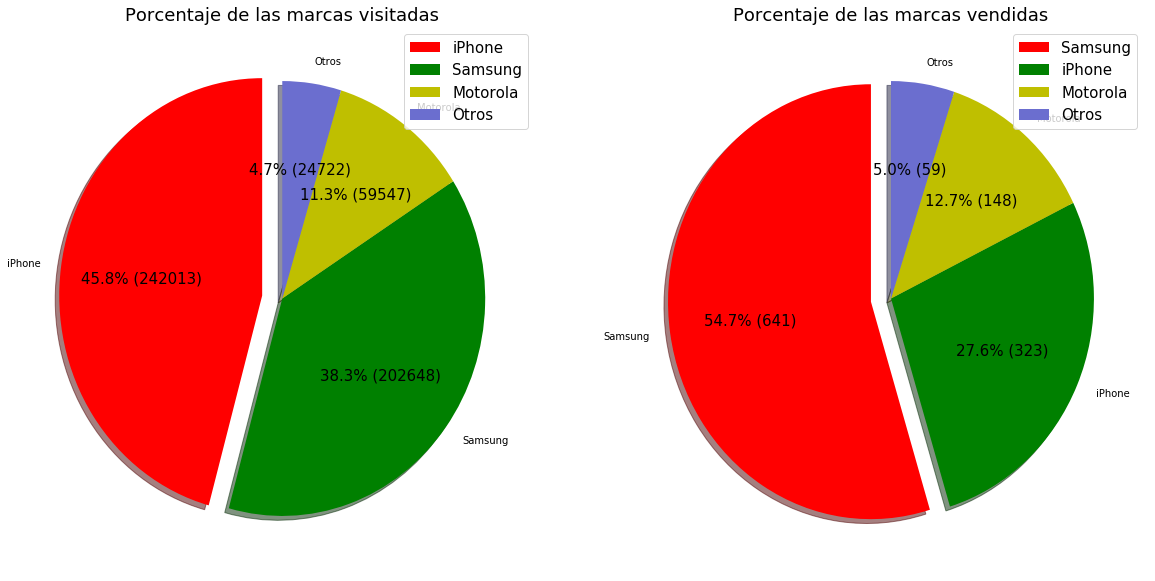

In [114]:
fig, axs = plt.subplots(1,2, figsize=(20,10))

cantOtros_visitas=sum(dataPie.cantidad[3:9])
sizes_visitas = [dataPie.cantidad[0], dataPie.cantidad[1], dataPie.cantidad[2],cantOtros_visitas]
nombres_visitas = [dataPie.brand_model[0],dataPie.brand_model[1],dataPie.brand_model[2], 'Otros']
explode_visitas = (0.1, 0, 0, 0)

cantOtros_venta=sum(dataPieII.cantidad[3:7])
sizes_venta = [dataPieII.cantidad[0], dataPieII.cantidad[1], dataPieII.cantidad[2],cantOtros_venta]
nombres_venta = [dataPieII.brand_model[0],dataPieII.brand_model[1],dataPieII.brand_model[2], 'Otros']

colors = ['r', 'g', 'y', '#6b6ecf']

axs[0].pie(sizes_visitas, explode=explode_visitas,labels=nombres_visitas, autopct=lambda p: '{0:.1f}% ({1:})'. format(p, int(p * sum(sizes_visitas) / 100)),
           startangle=90,colors=colors,shadow=True,textprops={'fontsize': 15})

axs[0].set_title('Porcentaje de las marcas visitadas',fontsize=18)    
axs[0].set_size=(30)
axs[1].pie(sizes_venta,explode=explode_visitas,labels=nombres_venta,autopct=lambda p: '{0:.1f}% ({1:})'. format(p, int(p * sum(sizes_venta) / 100)),
           startangle=90,colors=colors, shadow=True,textprops={'fontsize': 15})
axs[1].set_title('Porcentaje de las marcas vendidas',fontsize=18)

axs[1].set_size=(30)
axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)

plt.show()

# Este otro grafico representa las marcas más visitadas

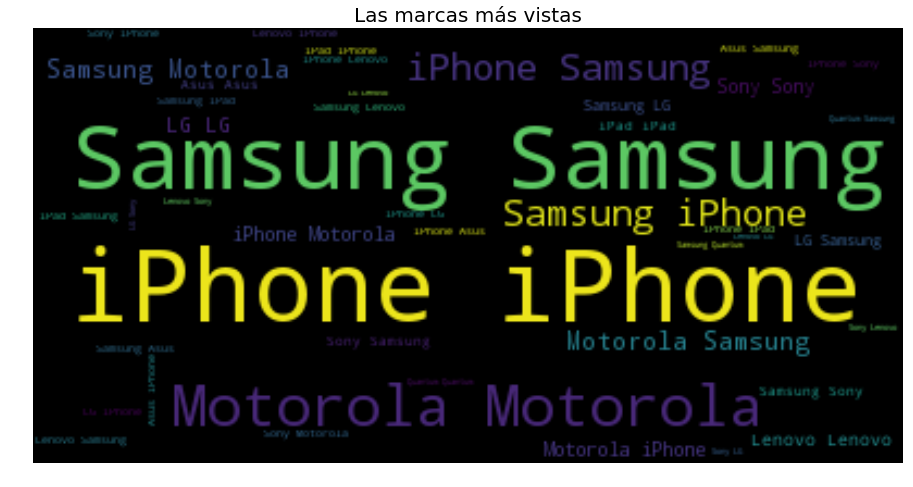

In [119]:
from wordcloud import WordCloud

text =" ".join(review for review in eventViewed_DistriModel.brand_model)


wordcloud = WordCloud().generate(text)


plt.figure(figsize=[16,8])
plt.title("Las marcas más vistas",fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Conclusión: Como podemos ver las marcas mas vistas son "IPHONE'S, SAMSUNG, MOTOROLA" y las mas vendidas son tambien las mismas quizas una con mayor porcentaje.

# Visu 7: Cantidad de vistas de los productos por marca y condición

In [116]:
eventViewed_DistriModel.head()

,timestamp,event,person,sku,model,condition,storage,color,brand_model,version_model
2,2018-05-31 23:38:09,viewed product,0004b0a2,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,iPhone,5s
4,2018-05-29 13:29:25,viewed product,0006a21a,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,Samsung,Galaxy S8
13,2018-04-09 20:13:14,viewed product,000a54b2,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto,Motorola,Moto Z Play
22,2018-05-24 11:27:47,viewed product,000a54b2,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado,iPhone,7 Plus
26,2018-05-24 11:28:59,viewed product,000a54b2,6581.0,iPhone 6S,Bom,16GB,Cinza espacial,iPhone,6S


In [172]:
condition_brand=eventViewed_DistriModel[['condition','brand_model']]
condition_brand['cantidad']=1
condition_brand=condition_brand.groupby(by=['condition','brand_model']).agg({'cantidad':'sum'})
condition_brand=condition_brand.sort_values(by='cantidad',ascending=False)
condition_brand.reset_index(inplace=True)
condition_brand.head()

,condition,brand_model,cantidad
0,Bom,Samsung,100335
1,Bom,iPhone,91449
2,Muito Bom,iPhone,68932
3,Excelente,iPhone,67475
4,Excelente,Samsung,52018


In [173]:
condition_brand=condition_brand.pivot(index='condition',columns='brand_model',values='cantidad')

In [174]:
condition_brand.fillna(0,inplace=True)
condition_brand

brand_model,Asus,LG,Lenovo,Motorola,Quantum,Samsung,Sony,iPad,iPhone
condition,,,,,,,,,
Bom,500.0,3617.0,1508.0,26429.0,151.0,100335.0,2923.0,259.0,91449.0
Bom - Sem Touch ID,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,14158.0
Excelente,691.0,2302.0,1676.0,15849.0,217.0,52018.0,2189.0,1161.0,67475.0
Muito Bom,832.0,3179.0,1299.0,17269.0,129.0,49094.0,1670.0,419.0,68932.0
Novo,0.0,0.0,0.0,0.0,0.0,1176.0,0.0,0.0,0.0


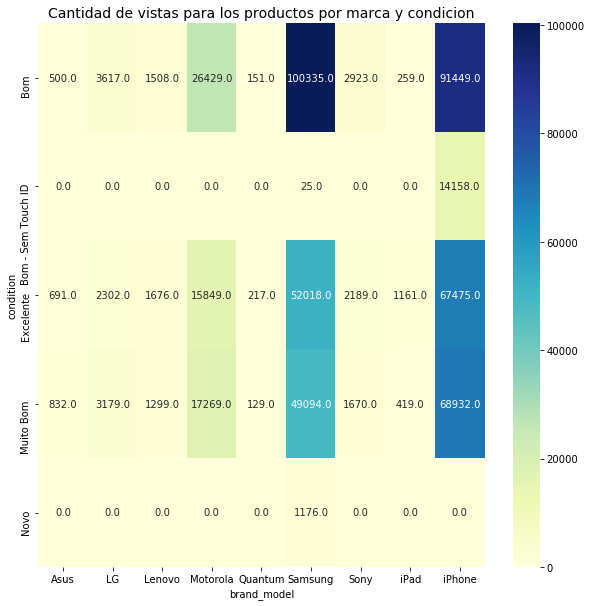

In [178]:
plt.figure(figsize=[10,10])
plt.title("Cantidad de vistas para los productos por marca y condicion",fontsize=14)
sns.heatmap(condition_brand, annot=True,fmt=".1f",cmap="YlGnBu")
plt.show()

# CANTIDAD DE PRODUCTOS VENDIDOS POR MARCA Y CONDICION

In [120]:
eventConversion_DistriModel.head()

,timestamp,event,person,sku,model,condition,storage,color,brand_model,version_model
220,2018-03-20 17:46:12,conversion,00204059,3084.0,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,Motorola,Moto X2
2282,2018-04-26 22:28:53,conversion,00c13dee,6650.0,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,Samsung,Galaxy Core Plus Duos TV
2547,2018-06-10 14:37:50,conversion,00fdbb4b,3348.0,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco,Samsung,Galaxy S6 Flat
4245,2018-03-16 13:50:25,conversion,0146a9df,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,iPhone,5s
6985,2018-02-09 22:07:07,conversion,01db2fe6,6357.0,Samsung Galaxy J5,Bom,16GB,Preto,Samsung,Galaxy J5


In [121]:
#veamos si hay un duplicado en sku y condition
# codigoProducto[codigoProducto.duplicated(subset='sku',keep=False)]
eventConversion_DistriModel[eventConversion_DistriModel.duplicated(subset=['sku','condition'])]

,timestamp,event,person,sku,model,condition,storage,color,brand_model,version_model
20275,2018-04-30 17:24:24,conversion,0562e9d2,88.0,iPhone 4G,Excelente,16GB,Preto,iPhone,4G
29764,2018-04-24 21:03:50,conversion,07da282e,1302.0,iPhone 6,Muito Bom,16GB,Prateado,iPhone,6
29767,2018-04-25 22:45:41,conversion,07da282e,1302.0,iPhone 6,Muito Bom,16GB,Prateado,iPhone,6
29768,2018-04-26 18:48:08,conversion,07da282e,1302.0,iPhone 6,Muito Bom,16GB,Prateado,iPhone,6
36220,2018-05-10 14:23:08,conversion,0a37e81a,2833.0,iPhone 6,Bom,64GB,Cinza espacial,iPhone,6
47593,2018-03-19 17:16:58,conversion,0da63237,6819.0,Samsung Galaxy S5 New Edition Duos,Bom,16GB,Dourado,Samsung,Galaxy S5 New Edition Duos
50789,2018-01-29 14:52:45,conversion,0eae7022,2987.0,Samsung Galaxy A3 Duos,Bom,16GB,Preto,Samsung,Galaxy A3 Duos
50802,2018-02-02 12:16:22,conversion,0eae7022,2987.0,Samsung Galaxy A3 Duos,Bom,16GB,Preto,Samsung,Galaxy A3 Duos
50967,2018-03-13 12:24:21,conversion,0eb58ffb,6370.0,Samsung Galaxy J5,Muito Bom,16GB,Dourado,Samsung,Galaxy J5
51977,2018-05-18 17:47:23,conversion,0ee60361,6001.0,iPhone 6,Bom - Sem Touch ID,16GB,Cinza espacial,iPhone,6


# visu 8: Las URL mas buscadas mediante que campaña de marketing sera efectuada, esa url representa a las marcas mas visitada como vendidas

In [241]:
sitio_campania=eventCampania[['url','campaign_source']]
sitio_campania.head()

,url,campaign_source
0,/comprar/iphone/iphone-5s,criteo
6,/comprar/samsung/galaxy-s8,criteo
11,/,google
15,/,google
99,/comprar/samsung/galaxy-j5,google


In [242]:
sitio_campania.campaign_source.unique()

array(['criteo', 'google', 'FacebookAds', 'zanox', 'rtbhouse', 'voxus',
       'bing', 'afilio', 'emblue', 'mercadopago', 'FacebookSocial',
       'datacrush', 'indexa', 'buscape', 'Facebook', 'rakuten', 'blog',
       'yotpo', nan, 'manifest', 'afiliado', 'MARKETING SOCIAL',
       'socialmedia', 'Google Social', 'onsite'], dtype=object)

In [240]:
sitio_campania.url.value_counts()

/                                                   28323
/comprar/iphone                                      4132
/comprar/iphone/6s                                   3393
/comprar/iphone/6                                    3228
/comprar/samsung                                     2782
/comprar/iphone/iphone-5s                            2689
/comprar/samsung/galaxy-j5                           2446
/comprar/samsung/galaxy-s7-edge                      1972
/comprar/samsung/galaxy-s8                           1499
/comprar/samsung/galaxy-j7                           1465
/comprar/samsung/galaxy-s6-edge                      1415
/comprar/motorola                                    1154
/comprar/samsung/galaxy-s7                           1139
/comprar/iphone/7                                    1120
/comprar/samsung/galaxy-s6-flat                      1067
/comprar/iphone/iphone-6s-plus                        947
/comprar/samsung/samsung-gran-prime-duos-tv           944
/comprar/samsu

In [247]:
sitio_campania.isna().sum()

url                71
campaign_source    31
dtype: int64

In [248]:
#eliminamos los nan's
sitio_campania.dropna(inplace=True)
sitio_campania.isna().sum()

url                0
campaign_source    0
dtype: int64

In [249]:
sitio_campania['cantidad']=1
sitio_campania=sitio_campania.groupby(by=['url','campaign_source']).agg({'cantidad':'sum'})
sitio_campania=sitio_campania.sort_values(by='cantidad',ascending=False)
sitio_campania.reset_index(inplace=True)
sitio_campania.head()


,url,campaign_source,cantidad
0,/,google,23540
1,/comprar/iphone,google,3966
2,/comprar/iphone/6s,google,2976
3,/comprar/samsung,google,2627
4,/comprar/samsung/galaxy-j5,google,1706


In [255]:
sitio_campania

,url,campaign_source,cantidad
0,/,google,23540
1,/comprar/iphone,google,3966
2,/comprar/iphone/6s,google,2976
3,/comprar/samsung,google,2627
4,/comprar/samsung/galaxy-j5,google,1706
5,/comprar/iphone/6,google,1576
6,/,zanox,1433
7,/comprar/iphone/iphone-5s,google,1274
8,/comprar/samsung/galaxy-s7-edge,google,1144
9,/comprar/motorola,google,1097


In [252]:
sitio_campania.url.duplicated().sum()

541

In [250]:
sitio_campania.campaign_source.value_counts()

google              211
rtbhouse            147
criteo              147
FacebookAds          73
emblue               48
buscape              47
datacrush            25
zanox                17
afilio               13
yotpo                 9
blog                  7
indexa                7
rakuten               3
bing                  3
afiliado              2
onsite                1
mercadopago           1
voxus                 1
FacebookSocial        1
Google Social         1
socialmedia           1
manifest              1
Facebook              1
MARKETING SOCIAL      1
Name: campaign_source, dtype: int64

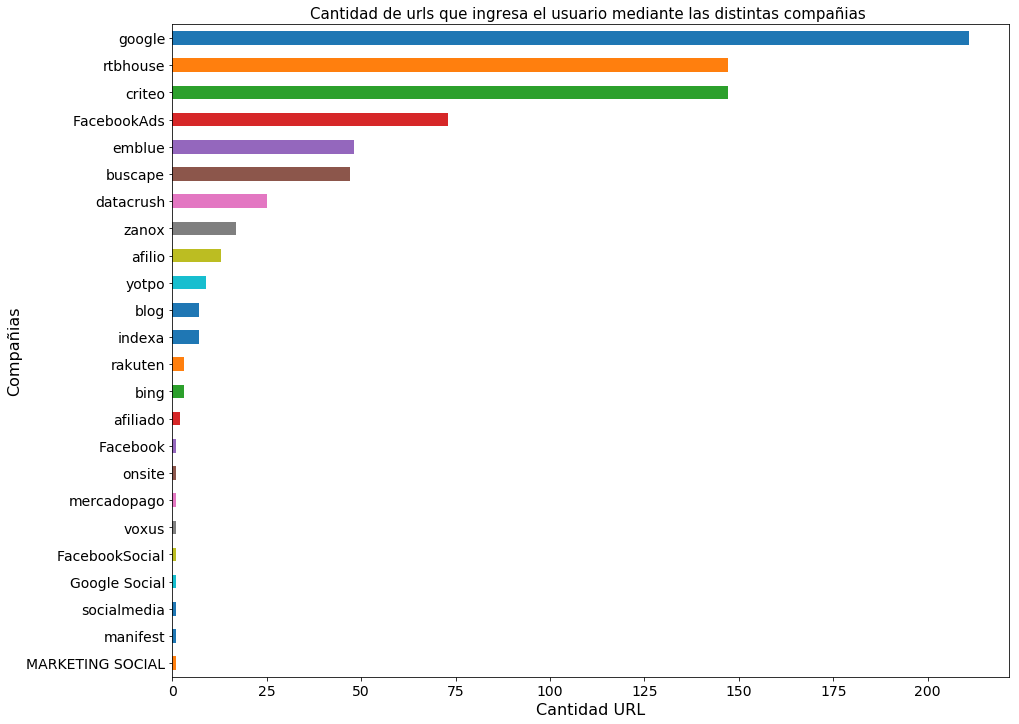

In [328]:
f = plt.figure()

graf=sitio_campania["campaign_source"].value_counts().sort_values(ascending=False)

plt.title('Cantidad de urls que ingresa el usuario mediante las distintas compañias ', color='black',fontsize=15)

ax=graf.plot(kind='barh',rot=0,figsize=(15,12),fontsize=14,align='center');
ax.invert_yaxis()
ax.set_ylabel('Compañias',fontsize=16);
ax.set_xlabel('Cantidad URL',fontsize=16);


# Ahora veremos la cantidad de usuarios que ingresaron a cada url por las compañias mas usadas
# Observacion: Como podemos ver tenemos valores que realmente no aportan mucha informacion o al menos que sea relevante ya que la cantidad de usuarios es uno solo para algunas url por lo que tomaremos cantidades mayor a 100

In [311]:
filtroCompania=sitio_campania[sitio_campania['cantidad']>=100]
filtroCompania

,url,campaign_source,cantidad
0,/,google,23540
1,/comprar/iphone,google,3966
2,/comprar/iphone/6s,google,2976
3,/comprar/samsung,google,2627
4,/comprar/samsung/galaxy-j5,google,1706
5,/comprar/iphone/6,google,1576
6,/,zanox,1433
7,/comprar/iphone/iphone-5s,google,1274
8,/comprar/samsung/galaxy-s7-edge,google,1144
9,/comprar/motorola,google,1097


In [312]:
grup_sitio_campania=filtroCompania.pivot(index='url',columns='campaign_source',values='cantidad')
grup_sitio_campania

campaign_source,FacebookAds,afilio,bing,criteo,emblue,google,indexa,manifest,rakuten,rtbhouse,voxus,zanox
url,,,,,,,,,,,,
/,170.0,611.0,470.0,470.0,450.0,23540.0,139.0,126.0,307.0,NaN,432.0,1433.0
/comprar/iphone,NaN,NaN,NaN,NaN,NaN,3966.0,NaN,NaN,NaN,NaN,NaN,NaN
/comprar/iphone/,NaN,NaN,NaN,NaN,NaN,508.0,NaN,NaN,NaN,NaN,NaN,NaN
/comprar/iphone/6,NaN,NaN,NaN,815.0,NaN,1576.0,NaN,NaN,NaN,734.0,NaN,NaN
/comprar/iphone/6-plus,NaN,NaN,NaN,NaN,NaN,274.0,NaN,NaN,NaN,NaN,NaN,NaN
/comprar/iphone/6s,NaN,NaN,NaN,NaN,NaN,2976.0,NaN,NaN,NaN,317.0,NaN,NaN
/comprar/iphone/7,NaN,NaN,NaN,172.0,NaN,700.0,NaN,NaN,NaN,239.0,NaN,NaN
/comprar/iphone/7-plus,NaN,NaN,NaN,NaN,NaN,496.0,NaN,NaN,NaN,126.0,NaN,NaN
/comprar/iphone/iphone-4g,NaN,NaN,NaN,NaN,NaN,172.0,NaN,NaN,NaN,NaN,NaN,NaN
